## Analysing the data

In [1]:
import pandas as pd
%pylab inline
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
X_train=pd.read_csv('final_train.csv')

In [3]:
X_test=pd.read_csv('final_test.csv')

In [4]:
pd.options.display.max_columns = None
display(X_train)

,Unnamed: 0,pokemonId,latitude,longitude,appearedTimeOfDay,appearedHour,appearedMinute,closeToWater,continent,weather,temperature,windSpeed,windBearing,pressure,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,pokestopDistanceKm
0,53953,54,29.934603,-90.061284,evening,19.0,1.0,True,America,Clear,30.6,3.54,34.0,1020.02,401.0,6.0,41.0,492.0,1158.0,19.0,18.0,265.0,1955.863600,True,True,True,False,0.045330,0.069448
1,187357,96,42.643452,-71.317905,night,20.0,45.0,False,America,Clear,24.2,10.78,76.0,1026.29,375.0,6.0,15.0,541.0,1156.0,19.0,16.0,240.0,1691.790000,True,True,True,False,0.225181,0.041735
2,46435,19,42.008677,2.285779,night,22.0,6.0,False,Europe,Clear,24.5,1.53,226.0,1015.69,443.0,7.0,23.0,908.0,1217.0,20.0,17.0,-134.0,355.779660,False,False,True,False,0.643477,0.643477
3,25907,48,39.416425,-77.423176,night,4.0,41.0,False,America,Clear,22.6,9.97,280.0,1016.89,405.0,6.0,45.0,-346.0,1172.0,19.0,32.0,1113.0,849.442260,True,True,True,False,0.301872,0.039712
4,258794,19,20.565804,-97.443755,afternoon,14.0,30.0,False,America,Overcast,24.9,4.16,287.0,1011.95,435.0,7.0,15.0,28.0,1185.0,19.0,45.0,722.0,2431.234100,True,True,True,False,55.708700,55.7087
5,131519,19,36.641127,-87.286428,evening,17.0,23.0,False,America,Clear,28.9,10.90,206.0,1022.78,385.0,6.0,25.0,240.0,1152.0,19.0,12.0,527.0,69.585650,False,False,False,True,3.116567,3.116567
6,41339,13,33.005880,-83.541956,night,23.0,56.0,False,America,Clear,32.2,5.16,143.0,1020.79,433.0,7.0,13.0,644.0,1194.0,19.0,54.0,117.0,7.085878,False,False,False,True,0.851951,0.187691
7,107023,13,49.119370,-122.665339,night,1.0,22.0,False,America,Clear,14.8,6.58,155.0,1015.67,395.0,6.0,35.0,589.0,1186.0,19.0,46.0,202.0,296.784300,False,False,True,False,0.478494,0.057404
8,136834,13,39.749604,-84.080203,afternoon,14.0,55.0,False,America,Clear,19.3,3.91,169.0,1024.33,430.0,7.0,10.0,106.0,1202.0,20.0,2.0,666.0,570.040200,False,True,True,False,2.536237,0.01906
9,236402,118,40.641700,15.802383,night,23.0,49.0,False,Europe,Clear,20.4,7.57,308.0,1016.30,387.0,6.0,27.0,1045.0,1167.0,19.0,27.0,-265.0,396.666200,False,False,True,False,0.356114,0.258155


Converting Categorical Variables with string Values to Int values

In [5]:
X_train.urban = X_train.urban.astype(int)
X_train.closeToWater=X_train.suburban.astype(int) 
X_train.midurban=X_train.midurban.astype(int) 
X_train.rural=X_train.rural.astype(int)




In [6]:
X_test.urban = X_test.urban.astype(int)
X_test.closeToWater=X_test.closeToWater.astype(int)
X_test.suburban=X_test.suburban.astype(int) 
X_test.midurban=X_test.midurban.astype(int) 
X_test.rural=X_test.rural.astype(int)


Seperating Dependent Variables

In [7]:
Y_train=pd.DataFrame() 
Y_train['latitude']=X_train['latitude']
Y_train['longitude']=X_train['longitude']


In [8]:
Y_test=pd.DataFrame()
Y_test['latitude']=X_test['latitude']
Y_test['longitude']=X_test['longitude']

In [9]:
display(Y_train)

,latitude,longitude
0,29.934603,-90.061284
1,42.643452,-71.317905
2,42.008677,2.285779
3,39.416425,-77.423176
4,20.565804,-97.443755
5,36.641127,-87.286428
6,33.005880,-83.541956
7,49.119370,-122.665339
8,39.749604,-84.080203
9,40.641700,15.802383


In [10]:
del X_train['latitude']
del X_train['longitude']
del X_train['appearedTimeOfDay']
del X_train['continent']
del X_train['weather']
del X_train['Unnamed: 0']
del X_train['pokestopDistanceKm']
X_train.urban = X_train.urban.astype(float)
X_train.closeToWater=X_train.closeToWater.astype(float)
X_train.suburban=X_train.suburban.astype(float) 
X_train.midurban=X_train.midurban.astype(float) 
X_train.pokemonId=X_train.pokemonId.astype(float) 
 
display(X_train) 





,pokemonId,appearedHour,appearedMinute,closeToWater,temperature,windSpeed,windBearing,pressure,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm
0,54.0,19.0,1.0,1.0,30.6,3.54,34.0,1020.02,401.0,6.0,41.0,492.0,1158.0,19.0,18.0,265.0,1955.863600,1.0,1.0,1.0,0,0.045330
1,96.0,20.0,45.0,1.0,24.2,10.78,76.0,1026.29,375.0,6.0,15.0,541.0,1156.0,19.0,16.0,240.0,1691.790000,1.0,1.0,1.0,0,0.225181
2,19.0,22.0,6.0,0.0,24.5,1.53,226.0,1015.69,443.0,7.0,23.0,908.0,1217.0,20.0,17.0,-134.0,355.779660,0.0,0.0,1.0,0,0.643477
3,48.0,4.0,41.0,1.0,22.6,9.97,280.0,1016.89,405.0,6.0,45.0,-346.0,1172.0,19.0,32.0,1113.0,849.442260,1.0,1.0,1.0,0,0.301872
4,19.0,14.0,30.0,1.0,24.9,4.16,287.0,1011.95,435.0,7.0,15.0,28.0,1185.0,19.0,45.0,722.0,2431.234100,1.0,1.0,1.0,0,55.708700
5,19.0,17.0,23.0,0.0,28.9,10.90,206.0,1022.78,385.0,6.0,25.0,240.0,1152.0,19.0,12.0,527.0,69.585650,0.0,0.0,0.0,1,3.116567
6,13.0,23.0,56.0,0.0,32.2,5.16,143.0,1020.79,433.0,7.0,13.0,644.0,1194.0,19.0,54.0,117.0,7.085878,0.0,0.0,0.0,1,0.851951
7,13.0,1.0,22.0,0.0,14.8,6.58,155.0,1015.67,395.0,6.0,35.0,589.0,1186.0,19.0,46.0,202.0,296.784300,0.0,0.0,1.0,0,0.478494
8,13.0,14.0,55.0,1.0,19.3,3.91,169.0,1024.33,430.0,7.0,10.0,106.0,1202.0,20.0,2.0,666.0,570.040200,0.0,1.0,1.0,0,2.536237
9,118.0,23.0,49.0,0.0,20.4,7.57,308.0,1016.30,387.0,6.0,27.0,1045.0,1167.0,19.0,27.0,-265.0,396.666200,0.0,0.0,1.0,0,0.356114


In [11]:
del X_test['latitude']
del X_test['longitude']
del X_test['appearedTimeOfDay']
del X_test['continent']
del X_test['weather']
del X_test['Unnamed: 0']
del X_test['pokestopDistanceKm']
X_test.urban = X_test.urban.astype(float)
X_test.closeToWater=X_test.closeToWater.astype(float)
X_test.suburban=X_test.suburban.astype(float) 
X_test.midurban=X_test.midurban.astype(float) 
X_test.rural=X_test.rural.astype(float)
X_test.pokemonId=X_test.pokemonId.astype(float) 

### Implementing Random Forest Regressor 

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=400, oob_score=True,n_jobs=-1, random_state=50,max_features="auto",min_samples_split=2)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=400, n_jobs=-1, oob_score=True, random_state=50,
           verbose=0, warm_start=False)

In [13]:
model.oob_score_

0.99708583868927492

In [14]:
y_pred=model.predict(X_test)

In [15]:
y_pred

array([[   4.60820866,  114.33036453],
       [  50.71300927,   -1.98975905],
       [  53.61255874, -113.38025989],
       ..., 
       [  41.6883257 ,    2.7927674 ],
       [  48.48793581,  -93.28581249],
       [  57.69803769,   11.92920948]])

Implementing Heatmap

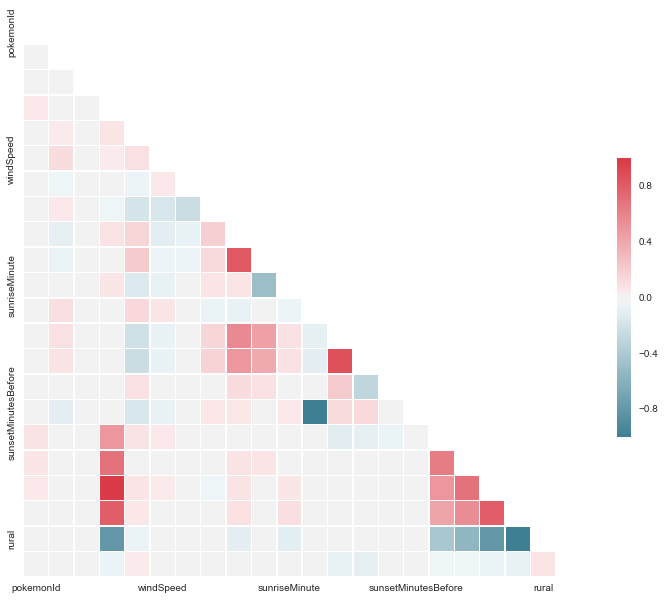

In [16]:
from string import letters
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")

#Lets calculate the corelation matrix 
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,square=True, 
            xticklabels=5, yticklabels=5,linewidths=.5, 
            cbar_kws={"shrink": .5}, ax=ax)